#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [52]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
%matplotlib inline

In [53]:
df = pd.read_csv('car_evaluation_0.csv')
df.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [54]:
df1 = pd.read_csv('car_evaluation_1.csv')
df1.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,high,vhigh,2,2,small,med,unacc
1,high,vhigh,2,2,small,high,unacc
2,high,vhigh,2,2,med,low,unacc
3,high,vhigh,2,2,med,med,unacc
4,high,vhigh,2,2,med,high,unacc


In [55]:
df2 = pd.read_csv('car_evaluation_2.csv')
df2.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,med,vhigh,2,2,small,med,unacc
1,med,vhigh,2,2,small,high,unacc
2,med,vhigh,2,2,med,low,unacc
3,med,vhigh,2,2,med,med,unacc
4,med,vhigh,2,2,med,high,unacc


In [56]:
df3 = pd.read_csv('car_evaluation_3.csv')
df3.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,low,vhigh,2,2,small,med,unacc
1,low,vhigh,2,2,small,high,unacc
2,low,vhigh,2,2,med,low,unacc
3,low,vhigh,2,2,med,med,unacc
4,low,vhigh,2,2,med,high,unacc


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buyPrice     432 non-null    object
 1   maintCost    432 non-null    object
 2   noDoors      432 non-null    object
 3   noPersons    432 non-null    object
 4   bootLuggage  432 non-null    object
 5   safety       432 non-null    object
 6   decision     432 non-null    object
dtypes: object(7)
memory usage: 23.8+ KB


In [58]:
df = pd.concat([df, df1, df2, df3], ignore_index=True)
df.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [59]:
df.head()
df.tail()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [60]:
df['buyPrice'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: buyPrice, dtype: int64

In [61]:
df['maintCost'].value_counts()

high     432
med      432
low      432
vhigh    431
Name: maintCost, dtype: int64

In [62]:
df['noDoors'].value_counts()

3        432
4        432
5more    432
2        431
Name: noDoors, dtype: int64

In [63]:
df['noPersons'].value_counts()

4       576
more    576
2       575
Name: noPersons, dtype: int64

In [64]:
df['bootLuggage'].value_counts()

med      576
big      576
small    575
Name: bootLuggage, dtype: int64

In [65]:
df['safety'].value_counts()

med     576
high    576
low     575
Name: safety, dtype: int64

In [66]:
df['decision'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: decision, dtype: int64

In [67]:
df.replace(to_replace=['low','med','high','vhigh'], value=[1,2,3,4], inplace=True)

In [68]:
df.replace(to_replace=['small','big'], value=[1,3], inplace=True)

In [69]:
df.replace(to_replace=['2','3','4','5more','more'], value=[2,3,4,5,5], inplace=True)

In [70]:
df.replace(to_replace=['unacc','acc','good','vgood'], value=[1,2,3,4], inplace=True)

In [71]:
df.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,4,4,2,2,1,2,1
1,4,4,2,2,1,3,1
2,4,4,2,2,2,1,1
3,4,4,2,2,2,2,1
4,4,4,2,2,2,3,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int64
 1   maintCost    1727 non-null   int64
 2   noDoors      1727 non-null   int64
 3   noPersons    1727 non-null   int64
 4   bootLuggage  1727 non-null   int64
 5   safety       1727 non-null   int64
 6   decision     1727 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


In [73]:
# memory size reduction

columns = ['buyPrice', 'maintCost','noDoors','noPersons','bootLuggage','safety','decision']

for column in columns:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   buyPrice     1727 non-null   int8 
 1   maintCost    1727 non-null   int8 
 2   noDoors      1727 non-null   int8 
 3   noPersons    1727 non-null   int8 
 4   bootLuggage  1727 non-null   int8 
 5   safety       1727 non-null   int8 
 6   decision     1727 non-null   int8 
dtypes: int8(7)
memory usage: 11.9 KB


In [75]:
X = df.drop('decision',axis=1).values

In [76]:
# get y from data
y = df['decision'].values

In [77]:

#  Print shapes of X ond y to make sure everything is good
# Print shape of X
print(X.shape)

# Print shape of y 
print(y.shape)

# Print X
print(X)

#printy
print(y)

(1727, 6)
(1727,)
[[4 4 2 2 1 2]
 [4 4 2 2 1 3]
 [4 4 2 2 2 1]
 ...
 [1 1 5 5 3 1]
 [1 1 5 5 3 2]
 [1 1 5 5 3 3]]
[1 1 1 ... 1 3 4]


In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [82]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(1554, 6)
(173, 6)
(1554,)
(173,)


In [83]:
clf_entropy = DecisionTreeClassifier(criterion= 'entropy')

In [84]:
clf_entropy = clf_entropy.fit(X_train, y_train)

In [85]:
feature_name = df.columns[:-1]
target_name = df.columns[-1]

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

decision


In [91]:
print(feature_name, '\n')
print(df[target_name].value_counts())

Index(['buyPrice', 'maintCost', 'noDoors', 'noPersons', 'bootLuggage',
       'safety'],
      dtype='object') 

1    1209
2     384
3      69
4      65
Name: decision, dtype: int64


In [92]:
tree.export_graphviz(clf_entropy, out_file='tree_grid_clf_entropy.dot', feature_names=feature_name, filled = True)

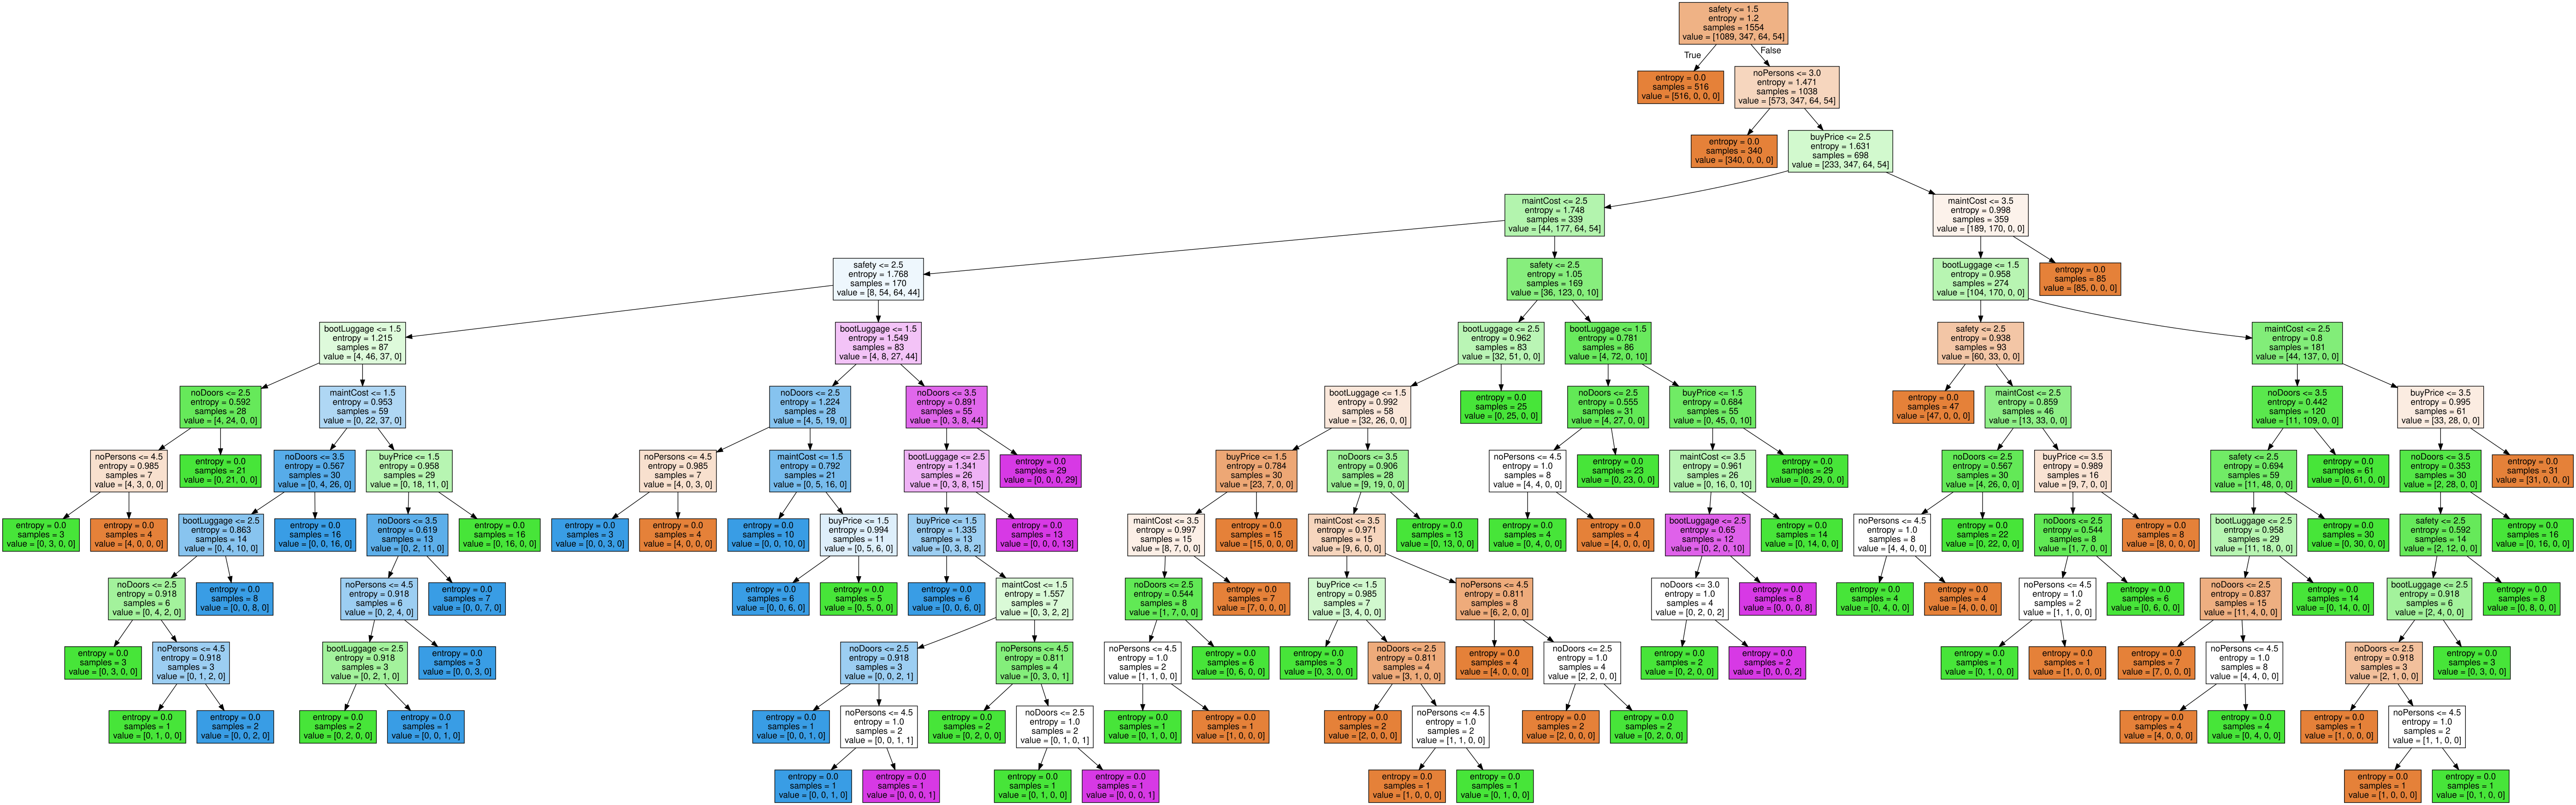

In [94]:
display(Image('tree_grid_clf_entropy.png',unconfined=False))

In [95]:
# Create an empty list accuracy
accuracy = []

# Create an empty list train_scores_models
test_scores_DT_models = []

# Create an empty list of models
DT_models = []


In [100]:

y_pred = clf_entropy.predict(X_test)

test_score = accuracy_score(y_test, y_pred)

accuracy.append(test_score)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))
print("Precision test set: ", precision_score(y_test, y_pred, average = "weighted"))
print("Recall test set: ", recall_score(y_test, y_pred, average="weighted"))
print("F-score test set: ", f1_score(y_test, y_pred, average = "weighted" ))

NameError: name 'accuracy_score' is not defined

In [ ]:

#gini
#log_lost

# Index(['buyPrice', 'maintCost', 'noDoors',
# •safety'],
# "noPersons", 'bootLuggage",
# dtypes 'object')
# decision

       
# tree. export_graphviz (clf_entropy, out_files tree_grid_clf _entropy. dot'
# feature_names=feature_name,
# # replace index numbers with their names in the figure
# #class_names- [target_name],
# filled True ) # color the vertices of the graph

# # View the tree image
# #flg - plt.figure（figstze=（25, 20））
# display (Image('tree_grid_clf_entgo aned=True) )

# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [51]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################